# portfolio

In [1]:
import vectorbt as vbt

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from numba import njit, f8, i8, b1, optional

In [3]:
from datetime import datetime
index = pd.Index([
    datetime(2020, 1, 1),
    datetime(2020, 1, 2),
    datetime(2020, 1, 3),
    datetime(2020, 1, 4),
    datetime(2020, 1, 5),
    datetime(2020, 1, 6),
    datetime(2020, 1, 7),
])
ts = pd.DataFrame({
    'a': [1, 2, 3, 4, 5, 6, 7],
    'b': [9, 8, 7, 6, 5, 4, 3],
    'c': [1, 2, 3, 4, 3, 2, 1],
    'd': [4, 3, 2, 1, 2, 3, 4]
}, index=index).astype(float)

print(ts)

              a    b    c    d
2020-01-01  1.0  9.0  1.0  4.0
2020-01-02  2.0  8.0  2.0  3.0
2020-01-03  3.0  7.0  3.0  2.0
2020-01-04  4.0  6.0  4.0  1.0
2020-01-05  5.0  5.0  3.0  2.0
2020-01-06  6.0  4.0  2.0  3.0
2020-01-07  7.0  3.0  1.0  4.0


In [4]:
big_ts = pd.DataFrame(np.random.uniform(size=(1000, 1000)).astype(float))
big_ts.index = [datetime(2018, 1, 1) + timedelta(days=i) for i in range(1000)]
big_ts.shape

(1000, 1000)

In [5]:
entries = pd.DataFrame.vbt.signals.generate_random(ts.shape, 2, min_space=1, seed=42, index=ts.index, columns=ts.columns)
big_entries = pd.DataFrame.vbt.signals.generate_random(big_ts.shape, 100, min_space=1, seed=42, index=big_ts.index)

print(entries)

                a      b      c      d
2020-01-01  False  False   True  False
2020-01-02  False  False  False  False
2020-01-03   True   True  False   True
2020-01-04  False  False  False  False
2020-01-05   True   True  False  False
2020-01-06  False  False  False  False
2020-01-07  False  False   True   True


/Users/olegpolakow/Documents/SourceTree/vectorbt/vectorbt/signals/nb.py:152: NumbaWarning:

Cannot cache compiled function "generate_random_nb" as it uses dynamic globals (such as ctypes pointers and large global arrays)



In [6]:
exits = entries.vbt.signals.generate_random_after(1, seed=42)
big_exits = big_entries.vbt.signals.generate_random_after(1, seed=42)

print(exits)

                a      b      c      d
2020-01-01  False  False  False  False
2020-01-02  False  False   True  False
2020-01-03  False  False  False  False
2020-01-04   True   True  False  False
2020-01-05  False  False  False   True
2020-01-06  False   True  False  False
2020-01-07   True  False  False  False


/Users/olegpolakow/Documents/SourceTree/vectorbt/vectorbt/signals/nb.py:163: NumbaWarning:

Cannot cache compiled function "generate_random_after_nb" as it uses dynamic globals (such as ctypes pointers and large global arrays)



In [7]:
vbt.defaults.portfolio['investment'] = 100 # set investment in cash globally

## from_signals

In [8]:
portfolio = vbt.Portfolio.from_signals(ts['a'], entries['a'], exits['a'], volume=1)
print(portfolio.trades)
print(portfolio.shares)
print(portfolio.cash)

%timeit vbt.Portfolio.from_signals(big_ts.iloc[:, 0], big_entries.iloc[:, 0], big_exits.iloc[:, 0], volume=1)
print(vbt.Portfolio.from_signals(big_ts.iloc[:, 0], big_entries.iloc[:, 0], big_exits.iloc[:, 0], volume=1).equity.shape)

2020-01-01    0.0
2020-01-02    0.0
2020-01-03    1.0
2020-01-04   -1.0
2020-01-05    1.0
2020-01-06    0.0
2020-01-07   -1.0
Name: a, dtype: float64
2020-01-01    0.0
2020-01-02    0.0
2020-01-03    1.0
2020-01-04    0.0
2020-01-05    1.0
2020-01-06    1.0
2020-01-07    0.0
Name: a, dtype: float64
2020-01-01    100.0
2020-01-02    100.0
2020-01-03     97.0
2020-01-04    101.0
2020-01-05     96.0
2020-01-06     96.0
2020-01-07    103.0
Name: a, dtype: float64
7.02 ms ± 933 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
(1000,)


In [9]:
portfolio = vbt.Portfolio.from_signals(ts['a'], entries, exits, volume=1) # test broadcasting
print(portfolio.trades)
print(portfolio.shares)
print(portfolio.cash)

%timeit vbt.Portfolio.from_signals(big_ts.iloc[:, 0], big_entries, big_exits, volume=1)
print(vbt.Portfolio.from_signals(big_ts.iloc[:, 0], big_entries, big_exits, volume=1).equity.shape)

              a    b    c    d
2020-01-01  0.0  0.0  1.0  0.0
2020-01-02  0.0  0.0 -1.0  0.0
2020-01-03  1.0  1.0  0.0  1.0
2020-01-04 -1.0 -1.0  0.0  0.0
2020-01-05  1.0  1.0  0.0 -1.0
2020-01-06  0.0 -1.0  0.0  0.0
2020-01-07 -1.0  0.0  1.0  1.0
              a    b    c    d
2020-01-01  0.0  0.0  1.0  0.0
2020-01-02  0.0  0.0  0.0  0.0
2020-01-03  1.0  1.0  0.0  1.0
2020-01-04  0.0  0.0  0.0  1.0
2020-01-05  1.0  1.0  0.0  0.0
2020-01-06  1.0  0.0  0.0  0.0
2020-01-07  0.0  0.0  1.0  1.0
                a      b      c      d
2020-01-01  100.0  100.0   99.0  100.0
2020-01-02  100.0  100.0  101.0  100.0
2020-01-03   97.0   97.0  101.0   97.0
2020-01-04  101.0  101.0  101.0   97.0
2020-01-05   96.0   96.0  101.0  102.0
2020-01-06   96.0  102.0  101.0  102.0
2020-01-07  103.0  102.0   94.0   95.0
163 ms ± 18.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
(1000, 1000)


In [10]:
portfolio = vbt.Portfolio.from_signals(ts, entries, exits, volume=1)
print(portfolio.trades)
print(portfolio.shares)
print(portfolio.cash)

%timeit vbt.Portfolio.from_signals(big_ts, big_entries, big_exits, volume=1)
print(vbt.Portfolio.from_signals(big_ts, big_entries, big_exits, volume=1).equity.shape)

              a    b    c    d
2020-01-01  0.0  0.0  1.0  0.0
2020-01-02  0.0  0.0 -1.0  0.0
2020-01-03  1.0  1.0  0.0  1.0
2020-01-04 -1.0 -1.0  0.0  0.0
2020-01-05  1.0  1.0  0.0 -1.0
2020-01-06  0.0 -1.0  0.0  0.0
2020-01-07 -1.0  0.0  1.0  1.0
              a    b    c    d
2020-01-01  0.0  0.0  1.0  0.0
2020-01-02  0.0  0.0  0.0  0.0
2020-01-03  1.0  1.0  0.0  1.0
2020-01-04  0.0  0.0  0.0  1.0
2020-01-05  1.0  1.0  0.0  0.0
2020-01-06  1.0  0.0  0.0  0.0
2020-01-07  0.0  0.0  1.0  1.0
                a      b      c      d
2020-01-01  100.0  100.0   99.0  100.0
2020-01-02  100.0  100.0  101.0  100.0
2020-01-03   97.0   93.0  101.0   98.0
2020-01-04  101.0   99.0  101.0   98.0
2020-01-05   96.0   94.0  101.0  100.0
2020-01-06   96.0   98.0  101.0  100.0
2020-01-07  103.0   98.0  100.0   96.0
165 ms ± 18.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
(1000, 1000)


In [11]:
portfolio = vbt.Portfolio.from_signals(ts, entries, exits, volume=np.inf) # all in/out
print(portfolio.trades)
print(portfolio.shares)
print(portfolio.cash)

%timeit vbt.Portfolio.from_signals(big_ts, big_entries, big_exits, volume=np.inf)
print(vbt.Portfolio.from_signals(big_ts, big_entries, big_exits, volume=np.inf).equity.shape)

                    a          b           c      d
2020-01-01   0.000000   0.000000    0.000000  25.00
2020-01-02   0.000000   0.000000    0.000000   0.00
2020-01-03  33.333333   0.000000   33.333333   0.00
2020-01-04 -33.333333   0.000000  -33.333333 -25.00
2020-01-05  26.666667  20.000000    0.000000   0.00
2020-01-06 -26.666667 -20.000000    0.000000   0.00
2020-01-07   0.000000  26.666667  133.333333   6.25
                    a          b           c      d
2020-01-01   0.000000   0.000000    0.000000  25.00
2020-01-02   0.000000   0.000000    0.000000  25.00
2020-01-03  33.333333   0.000000   33.333333  25.00
2020-01-04   0.000000   0.000000    0.000000   0.00
2020-01-05  26.666667  20.000000    0.000000   0.00
2020-01-06   0.000000   0.000000    0.000000   0.00
2020-01-07   0.000000  26.666667  133.333333   6.25
                     a      b           c     d
2020-01-01  100.000000  100.0  100.000000   0.0
2020-01-02  100.000000  100.0  100.000000   0.0
2020-01-03    0.000000  

In [11]:
portfolio = vbt.Portfolio.from_signals(ts, entries, exits, volume=1, commission=0.01) # w/ commission
print(portfolio.trades)
print(portfolio.shares)
print(portfolio.cash)

%timeit vbt.Portfolio.from_signals(big_ts, big_entries, big_exits, volume=1, commission=0.01)
print(vbt.Portfolio.from_signals(big_ts, big_entries, big_exits, volume=1, commission=0.01).equity.shape)

              a    b    c    d
2020-01-01  0.0  0.0  1.0  0.0
2020-01-02  0.0  0.0 -1.0  0.0
2020-01-03  1.0  1.0  0.0  1.0
2020-01-04 -1.0 -1.0  0.0  0.0
2020-01-05  1.0  1.0  0.0 -1.0
2020-01-06  0.0 -1.0  0.0  0.0
2020-01-07 -1.0  0.0  1.0  1.0
              a    b    c    d
2020-01-01  0.0  0.0  1.0  0.0
2020-01-02  0.0  0.0  0.0  0.0
2020-01-03  1.0  1.0  0.0  1.0
2020-01-04  0.0  0.0  0.0  1.0
2020-01-05  1.0  1.0  0.0  0.0
2020-01-06  1.0  0.0  0.0  0.0
2020-01-07  0.0  0.0  1.0  1.0
                 a       b       c       d
2020-01-01  100.00  100.00   98.99  100.00
2020-01-02  100.00  100.00  100.97  100.00
2020-01-03   96.97   92.93  100.97   97.98
2020-01-04  100.93   98.87  100.97   97.98
2020-01-05   95.88   93.82  100.97   99.96
2020-01-06   95.88   97.78  100.97   99.96
2020-01-07  102.81   97.78   99.96   95.92
179 ms ± 15.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
(1000, 1000)


In [12]:
portfolio = vbt.Portfolio.from_signals(ts, entries, exits, volume=1, slippage=0.01) # w/ slippage
print(portfolio.trades)
print(portfolio.shares)
print(portfolio.cash)

%timeit vbt.Portfolio.from_signals(big_ts, big_entries, big_exits, volume=1, slippage=0.01)
print(vbt.Portfolio.from_signals(big_ts, big_entries, big_exits, volume=1, slippage=0.01).equity.shape)

              a    b    c    d
2020-01-01  0.0  0.0  1.0  0.0
2020-01-02  0.0  0.0 -1.0  0.0
2020-01-03  1.0  1.0  0.0  1.0
2020-01-04 -1.0 -1.0  0.0  0.0
2020-01-05  1.0  1.0  0.0 -1.0
2020-01-06  0.0 -1.0  0.0  0.0
2020-01-07 -1.0  0.0  1.0  1.0
              a    b    c    d
2020-01-01  0.0  0.0  1.0  0.0
2020-01-02  0.0  0.0  0.0  0.0
2020-01-03  1.0  1.0  0.0  1.0
2020-01-04  0.0  0.0  0.0  1.0
2020-01-05  1.0  1.0  0.0  0.0
2020-01-06  1.0  0.0  0.0  0.0
2020-01-07  0.0  0.0  1.0  1.0
                 a       b       c       d
2020-01-01  100.00  100.00   98.99  100.00
2020-01-02  100.00  100.00  100.97  100.00
2020-01-03   96.97   92.93  100.97   97.98
2020-01-04  100.93   98.87  100.97   97.98
2020-01-05   95.88   93.82  100.97   99.96
2020-01-06   95.88   97.78  100.97   99.96
2020-01-07  102.81   97.78   99.96   95.92
183 ms ± 45.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
(1000, 1000)


## from_orders

In [8]:
volume = pd.DataFrame.vbt.timeseries.empty_like(ts, 1) # buy 1 share every day
big_volume = pd.DataFrame.vbt.timeseries.empty_like(big_ts, 1)

In [9]:
portfolio = vbt.Portfolio.from_volume(ts['a'], volume['a'])
print(portfolio.trades)
print(portfolio.shares)
print(portfolio.cash)

%timeit vbt.Portfolio.from_volume(big_ts.iloc[:, 0], big_volume.iloc[:, 0])
print(vbt.Portfolio.from_volume(big_ts.iloc[:, 0], big_volume.iloc[:, 0]).equity.shape)

2020-01-01    1.0
2020-01-02    1.0
2020-01-03    1.0
2020-01-04    1.0
2020-01-05    1.0
2020-01-06    1.0
2020-01-07    1.0
Name: a, dtype: float64
2020-01-01    1.0
2020-01-02    2.0
2020-01-03    3.0
2020-01-04    4.0
2020-01-05    5.0
2020-01-06    6.0
2020-01-07    7.0
Name: a, dtype: float64
2020-01-01    99.0
2020-01-02    97.0
2020-01-03    94.0
2020-01-04    90.0
2020-01-05    85.0
2020-01-06    79.0
2020-01-07    72.0
Name: a, dtype: float64
5.22 ms ± 624 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
(1000,)


In [10]:
portfolio = vbt.Portfolio.from_volume(ts['a'], volume)
print(portfolio.trades)
print(portfolio.shares)
print(portfolio.cash)

%timeit vbt.Portfolio.from_volume(big_ts.iloc[:, 0], big_volume)
print(vbt.Portfolio.from_volume(big_ts.iloc[:, 0], big_volume).equity.shape)

              a    b    c    d
2020-01-01  1.0  1.0  1.0  1.0
2020-01-02  1.0  1.0  1.0  1.0
2020-01-03  1.0  1.0  1.0  1.0
2020-01-04  1.0  1.0  1.0  1.0
2020-01-05  1.0  1.0  1.0  1.0
2020-01-06  1.0  1.0  1.0  1.0
2020-01-07  1.0  1.0  1.0  1.0
              a    b    c    d
2020-01-01  1.0  1.0  1.0  1.0
2020-01-02  2.0  2.0  2.0  2.0
2020-01-03  3.0  3.0  3.0  3.0
2020-01-04  4.0  4.0  4.0  4.0
2020-01-05  5.0  5.0  5.0  5.0
2020-01-06  6.0  6.0  6.0  6.0
2020-01-07  7.0  7.0  7.0  7.0
               a     b     c     d
2020-01-01  99.0  99.0  99.0  99.0
2020-01-02  97.0  97.0  97.0  97.0
2020-01-03  94.0  94.0  94.0  94.0
2020-01-04  90.0  90.0  90.0  90.0
2020-01-05  85.0  85.0  85.0  85.0
2020-01-06  79.0  79.0  79.0  79.0
2020-01-07  72.0  72.0  72.0  72.0
46.1 ms ± 17.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
(1000, 1000)


In [11]:
portfolio = vbt.Portfolio.from_volume(ts, volume)
print(portfolio.trades)
print(portfolio.shares)
print(portfolio.cash)

%timeit vbt.Portfolio.from_volume(big_ts, big_volume)
print(vbt.Portfolio.from_volume(big_ts, big_volume).equity.shape)

              a    b    c    d
2020-01-01  1.0  1.0  1.0  1.0
2020-01-02  1.0  1.0  1.0  1.0
2020-01-03  1.0  1.0  1.0  1.0
2020-01-04  1.0  1.0  1.0  1.0
2020-01-05  1.0  1.0  1.0  1.0
2020-01-06  1.0  1.0  1.0  1.0
2020-01-07  1.0  1.0  1.0  1.0
              a    b    c    d
2020-01-01  1.0  1.0  1.0  1.0
2020-01-02  2.0  2.0  2.0  2.0
2020-01-03  3.0  3.0  3.0  3.0
2020-01-04  4.0  4.0  4.0  4.0
2020-01-05  5.0  5.0  5.0  5.0
2020-01-06  6.0  6.0  6.0  6.0
2020-01-07  7.0  7.0  7.0  7.0
               a     b     c     d
2020-01-01  99.0  91.0  99.0  96.0
2020-01-02  97.0  83.0  97.0  93.0
2020-01-03  94.0  76.0  94.0  91.0
2020-01-04  90.0  70.0  90.0  90.0
2020-01-05  85.0  65.0  87.0  88.0
2020-01-06  79.0  61.0  85.0  85.0
2020-01-07  72.0  58.0  84.0  81.0
35.6 ms ± 5.95 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
(1000, 1000)


In [12]:
portfolio = vbt.Portfolio.from_volume(ts, volume, is_target=True) # target amount of shares to hold
print(portfolio.trades)
print(portfolio.shares)
print(portfolio.cash)

%timeit vbt.Portfolio.from_volume(big_ts, big_volume, is_target=True)
print(vbt.Portfolio.from_volume(big_ts, big_volume, is_target=True).equity.shape)

              a    b    c    d
2020-01-01  1.0  1.0  1.0  1.0
2020-01-02  0.0  0.0  0.0  0.0
2020-01-03  0.0  0.0  0.0  0.0
2020-01-04  0.0  0.0  0.0  0.0
2020-01-05  0.0  0.0  0.0  0.0
2020-01-06  0.0  0.0  0.0  0.0
2020-01-07  0.0  0.0  0.0  0.0
              a    b    c    d
2020-01-01  1.0  1.0  1.0  1.0
2020-01-02  1.0  1.0  1.0  1.0
2020-01-03  1.0  1.0  1.0  1.0
2020-01-04  1.0  1.0  1.0  1.0
2020-01-05  1.0  1.0  1.0  1.0
2020-01-06  1.0  1.0  1.0  1.0
2020-01-07  1.0  1.0  1.0  1.0
               a     b     c     d
2020-01-01  99.0  91.0  99.0  96.0
2020-01-02  99.0  91.0  99.0  96.0
2020-01-03  99.0  91.0  99.0  96.0
2020-01-04  99.0  91.0  99.0  96.0
2020-01-05  99.0  91.0  99.0  96.0
2020-01-06  99.0  91.0  99.0  96.0
2020-01-07  99.0  91.0  99.0  96.0
24.4 ms ± 6.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
(1000, 1000)


## from_order_func

In [18]:
@njit
def order_func_nb(col, i, run_cash, run_shares):
    return -i if i % 2 == 0 else i

portfolio = vbt.Portfolio.from_order_func(ts['a'], order_func_nb)
print(portfolio.trades)
print(portfolio.shares)
print(portfolio.cash)

%timeit vbt.Portfolio.from_order_func(big_ts.iloc[:, 0], order_func_nb)
print(vbt.Portfolio.from_order_func(big_ts.iloc[:, 0], order_func_nb).equity.shape)

2020-01-01    0.0
2020-01-02    1.0
2020-01-03   -1.0
2020-01-04    3.0
2020-01-05   -3.0
2020-01-06    5.0
2020-01-07   -5.0
Name: a, dtype: float64
2020-01-01    0.0
2020-01-02    1.0
2020-01-03    0.0
2020-01-04    3.0
2020-01-05    0.0
2020-01-06    5.0
2020-01-07    0.0
Name: a, dtype: float64
2020-01-01    100.0
2020-01-02     98.0
2020-01-03    101.0
2020-01-04     89.0
2020-01-05    104.0
2020-01-06     74.0
2020-01-07    109.0
Name: a, dtype: float64
2.8 ms ± 404 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
(1000,)


In [19]:
portfolio = vbt.Portfolio.from_order_func(ts, order_func_nb)
print(portfolio.trades)
print(portfolio.shares)
print(portfolio.cash)

%timeit vbt.Portfolio.from_order_func(big_ts, order_func_nb)
print(vbt.Portfolio.from_order_func(big_ts, order_func_nb).equity.shape)

              a    b    c    d
2020-01-01  0.0  0.0  0.0  0.0
2020-01-02  1.0  1.0  1.0  1.0
2020-01-03 -1.0 -1.0 -1.0 -1.0
2020-01-04  3.0  3.0  3.0  3.0
2020-01-05 -3.0 -3.0 -3.0 -3.0
2020-01-06  5.0  5.0  5.0  5.0
2020-01-07 -5.0 -5.0 -5.0 -5.0
              a    b    c    d
2020-01-01  0.0  0.0  0.0  0.0
2020-01-02  1.0  1.0  1.0  1.0
2020-01-03  0.0  0.0  0.0  0.0
2020-01-04  3.0  3.0  3.0  3.0
2020-01-05  0.0  0.0  0.0  0.0
2020-01-06  5.0  5.0  5.0  5.0
2020-01-07  0.0  0.0  0.0  0.0
                a      b      c      d
2020-01-01  100.0  100.0  100.0  100.0
2020-01-02   98.0   92.0   98.0   97.0
2020-01-03  101.0   99.0  101.0   99.0
2020-01-04   89.0   81.0   89.0   96.0
2020-01-05  104.0   96.0   98.0  102.0
2020-01-06   74.0   76.0   88.0   87.0
2020-01-07  109.0   91.0   93.0  107.0
26.8 ms ± 5.75 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
(1000, 1000)


## Indexing and magic methods

In [8]:
portfolio = vbt.Portfolio.from_signals(ts, entries, exits, commission=0.01)
big_portfolio = vbt.Portfolio.from_signals(big_ts, big_entries, big_exits, commission=0.01)

In [11]:
print(portfolio.iloc[:, 0].equity)

%timeit big_portfolio.ts.iloc[:, 0]
%timeit big_portfolio.iloc[:, 0].ts

2020-01-01    100.000000
2020-01-02    100.000000
2020-01-03     99.009901
2020-01-04    130.693069
2020-01-05    129.399079
2020-01-06    155.278894
2020-01-07    179.347123
Name: a, dtype: float64
54.8 µs ± 4.41 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.76 ms ± 95.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
portfolio_a = vbt.Portfolio.from_signals(ts, entries, exits, investment=100, slippage=0.01, commission=0.02)
portfolio_b = vbt.Portfolio.from_signals(ts, exits, entries, investment=200, slippage=0.01, commission=0.02)

portfolio_ab = portfolio_a + portfolio_b

print(portfolio_ab.ts)
print(portfolio_ab.cash)
print(portfolio_ab.shares)
print(portfolio_ab.investment)
print(portfolio_ab.slippage)
print(portfolio_ab.commission)

              a    b    c    d
2020-01-01  1.0  9.0  1.0  4.0
2020-01-02  2.0  8.0  2.0  3.0
2020-01-03  3.0  7.0  3.0  2.0
2020-01-04  4.0  6.0  4.0  1.0
2020-01-05  5.0  5.0  3.0  2.0
2020-01-06  6.0  4.0  2.0  3.0
2020-01-07  7.0  3.0  1.0  4.0
                     a           b           c           d
2020-01-01  300.000000  300.000000  200.000000  300.000000
2020-01-02  300.000000  300.000000  188.351776  300.000000
2020-01-03  200.000000  200.000000  188.351776  200.000000
2020-01-04  125.567851   80.722190  188.351776  200.000000
2020-01-05  235.439720  156.959814  188.351776   94.175888
2020-01-06  235.439720   60.816671  188.351776   94.175888
2020-01-07  165.556494   60.816671   94.175888  376.703553
                    a          b           c          d
2020-01-01   0.000000   0.000000   97.068530   0.000000
2020-01-02   0.000000   0.000000   97.068530   0.000000
2020-01-03  32.356177  13.866933   97.068530  48.534265
2020-01-04  48.534265  32.356177   97.068530  48.534265


## General properties

In [9]:
# Disable caching for performance testing
# NOTE: Expect waterfall of executions, since some attributes depend on other attributes 
# that have to be calculated again and again
vbt.defaults.cached_property = False

In [17]:
print(portfolio['a'].cash)
print(portfolio.cash)

%timeit big_portfolio.cash

2020-01-01    100.000000
2020-01-02    100.000000
2020-01-03      0.000000
2020-01-04    130.693069
2020-01-05      0.000000
2020-01-06      0.000000
2020-01-07    179.347123
Name: a, dtype: float64
                     a           b           c           d
2020-01-01  100.000000  100.000000    0.000000  100.000000
2020-01-02  100.000000  100.000000  196.039604  100.000000
2020-01-03    0.000000    0.000000  196.039604    0.000000
2020-01-04  130.693069   84.016973  196.039604    0.000000
2020-01-05    0.000000    0.000000  196.039604   98.019802
2020-01-06    0.000000   65.882617  196.039604   98.019802
2020-01-07  179.347123   65.882617    0.000000    0.000000
54.6 ns ± 3.32 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [18]:
print(portfolio['a'].shares)
print(portfolio.shares)

%timeit big_portfolio.shares

2020-01-01     0.000000
2020-01-02     0.000000
2020-01-03    33.003300
2020-01-04     0.000000
2020-01-05    25.879816
2020-01-06    25.879816
2020-01-07     0.000000
Name: a, dtype: float64
                    a          b           c          d
2020-01-01   0.000000   0.000000   99.009901   0.000000
2020-01-02   0.000000   0.000000    0.000000   0.000000
2020-01-03  33.003300  14.144272    0.000000  49.504950
2020-01-04   0.000000   0.000000    0.000000  49.504950
2020-01-05  25.879816  16.637024    0.000000   0.000000
2020-01-06  25.879816   0.000000    0.000000   0.000000
2020-01-07   0.000000   0.000000  194.098618  24.262327
52.5 ns ± 2.75 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [19]:
print(portfolio['a'].equity)
print(portfolio.equity)

%timeit big_portfolio.equity

2020-01-01    100.000000
2020-01-02    100.000000
2020-01-03     99.009901
2020-01-04    130.693069
2020-01-05    129.399079
2020-01-06    155.278894
2020-01-07    179.347123
Name: a, dtype: float64
                     a           b           c           d
2020-01-01  100.000000  100.000000   99.009901  100.000000
2020-01-02  100.000000  100.000000  196.039604  100.000000
2020-01-03   99.009901   99.009901  196.039604   99.009901
2020-01-04  130.693069   84.016973  196.039604   49.504950
2020-01-05  129.399079   83.185122  196.039604   98.019802
2020-01-06  155.278894   65.882617  196.039604   98.019802
2020-01-07  179.347123   65.882617  194.098618   97.049309
4.58 ms ± 63.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
print(portfolio['a'].equity_in_shares)
print(portfolio.equity_in_shares)

%timeit big_portfolio.equity_in_shares

2020-01-01    100.000000
2020-01-02     50.000000
2020-01-03     33.003300
2020-01-04     32.673267
2020-01-05     25.879816
2020-01-06     25.879816
2020-01-07     25.621018
Name: a, dtype: float64
                     a          b           c          d
2020-01-01  100.000000  11.111111   99.009901  25.000000
2020-01-02   50.000000  12.500000   98.019802  33.333333
2020-01-03   33.003300  14.144272   65.346535  49.504950
2020-01-04   32.673267  14.002829   49.009901  49.504950
2020-01-05   25.879816  16.637024   65.346535  49.009901
2020-01-06   25.879816  16.470654   98.019802  32.673267
2020-01-07   25.621018  21.960872  194.098618  24.262327
8.82 ms ± 261 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
print(portfolio['a'].returns)
print(portfolio.returns)

%timeit big_portfolio.equity.pct_change()
%timeit big_portfolio.returns # numba helps a lot

2020-01-01         NaN
2020-01-02    0.000000
2020-01-03   -0.009901
2020-01-04    0.320000
2020-01-05   -0.009901
2020-01-06    0.200000
2020-01-07    0.155000
Name: a, dtype: float64
                   a         b         c         d
2020-01-01       NaN       NaN       NaN       NaN
2020-01-02  0.000000  0.000000  0.980000  0.000000
2020-01-03 -0.009901 -0.009901  0.000000 -0.009901
2020-01-04  0.320000 -0.151429  0.000000 -0.500000
2020-01-05 -0.009901 -0.009901  0.000000  0.980000
2020-01-06  0.200000 -0.208000  0.000000  0.000000
2020-01-07  0.155000  0.000000 -0.009901 -0.009901
272 ms ± 5.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
10.6 ms ± 86.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
print(portfolio['a'].returns_in_shares)
print(portfolio.returns_in_shares)

%timeit big_portfolio.returns_in_shares

2020-01-01             NaN
2020-01-02   -5.000000e-01
2020-01-03   -3.399340e-01
2020-01-04   -1.000000e-02
2020-01-05   -2.079208e-01
2020-01-06   -1.110223e-16
2020-01-07   -1.000000e-02
Name: a, dtype: float64
                       a         b         c         d
2020-01-01           NaN       NaN       NaN       NaN
2020-01-02 -5.000000e-01  0.125000 -0.010000  0.333333
2020-01-03 -3.399340e-01  0.131542 -0.333333  0.485149
2020-01-04 -1.000000e-02 -0.010000 -0.250000  0.000000
2020-01-05 -2.079208e-01  0.188119  0.333333 -0.010000
2020-01-06 -1.110223e-16 -0.010000  0.500000 -0.333333
2020-01-07 -1.000000e-02  0.333333  0.980198 -0.257426
16.9 ms ± 558 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [23]:
print(portfolio['a'].drawdown)
print(portfolio.drawdown)

%timeit big_portfolio.drawdown

2020-01-01    0.000000
2020-01-02    0.000000
2020-01-03    0.009901
2020-01-04    0.000000
2020-01-05    0.009901
2020-01-06    0.000000
2020-01-07    0.000000
Name: a, dtype: float64
                   a         b         c         d
2020-01-01  0.000000  0.000000  0.000000  0.000000
2020-01-02  0.000000  0.000000  0.000000  0.000000
2020-01-03  0.009901  0.009901  0.000000  0.009901
2020-01-04  0.000000  0.159830  0.000000  0.504950
2020-01-05  0.009901  0.168149  0.000000  0.019802
2020-01-06  0.000000  0.341174  0.000000  0.019802
2020-01-07  0.000000  0.341174  0.009901  0.029507
27 ms ± 2.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
print(portfolio['a'].trades)
print(portfolio.trades)

%timeit big_portfolio.trades

2020-01-01     0.000000
2020-01-02     0.000000
2020-01-03    33.003300
2020-01-04   -33.003300
2020-01-05    25.879816
2020-01-06     0.000000
2020-01-07   -25.879816
Name: a, dtype: float64
                    a          b           c          d
2020-01-01   0.000000   0.000000   99.009901   0.000000
2020-01-02   0.000000   0.000000  -99.009901   0.000000
2020-01-03  33.003300  14.144272    0.000000  49.504950
2020-01-04 -33.003300 -14.144272    0.000000   0.000000
2020-01-05  25.879816  16.637024    0.000000 -49.504950
2020-01-06   0.000000 -16.637024    0.000000   0.000000
2020-01-07 -25.879816   0.000000  194.098618  24.262327
9.27 ms ± 486 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [25]:
print(portfolio['a'].position_pl)
print(portfolio.position_pl)

%timeit big_portfolio.position_pl

2020-01-01          NaN
2020-01-02          NaN
2020-01-03          NaN
2020-01-04          NaN
2020-01-05          NaN
2020-01-06    55.278894
2020-01-07          NaN
Name: a, dtype: float64
                    a          b          c          d
2020-01-01        NaN        NaN        NaN        NaN
2020-01-02        NaN        NaN        NaN        NaN
2020-01-03        NaN        NaN  96.039604        NaN
2020-01-04        NaN        NaN        NaN -50.495050
2020-01-05        NaN        NaN        NaN        NaN
2020-01-06  55.278894        NaN        NaN        NaN
2020-01-07        NaN -34.117383  -1.940986  -0.970493
35.9 ms ± 3.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [26]:
print(portfolio['a'].position_returns)
print(portfolio.position_returns)

%timeit big_portfolio.position_returns

2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-04         NaN
2020-01-05         NaN
2020-01-06    0.552789
2020-01-07         NaN
Name: a, dtype: float64
                   a         b         c         d
2020-01-01       NaN       NaN       NaN       NaN
2020-01-02       NaN       NaN       NaN       NaN
2020-01-03       NaN       NaN  0.960396       NaN
2020-01-04       NaN       NaN       NaN -0.504950
2020-01-05       NaN       NaN       NaN       NaN
2020-01-06  0.552789       NaN       NaN       NaN
2020-01-07       NaN -0.341174 -0.009901 -0.009901
34.4 ms ± 1.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Performance metrics

In [10]:
print(portfolio['a'].win_sum)
print(portfolio.win_sum)

%timeit big_portfolio.win_sum

79.34712283109499
a    79.347123
b     0.000000
c    96.039604
d     0.000000
dtype: float64
34.5 ms ± 1.89 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
print(portfolio['a'].loss_sum)
print(portfolio.loss_sum)

%timeit big_portfolio.loss_sum

0.0
a     0.000000
b    34.117383
c     1.940986
d     2.950691
dtype: float64
33.5 ms ± 1.71 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
print(portfolio['a'].win_mean)
print(portfolio.win_mean)

%timeit big_portfolio.win_mean

39.673561415547496
a    39.673561
b     0.000000
c    96.039604
d     0.000000
dtype: float64
34.1 ms ± 1.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
print(portfolio['a'].loss_mean)
print(portfolio.loss_mean)

%timeit big_portfolio.loss_mean

0.0
a     0.000000
b    17.058692
c     1.940986
d     1.475346
dtype: float64
35.9 ms ± 3.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
print(portfolio['a'].win_rate)
print(portfolio.win_rate)

%timeit big_portfolio.win_rate

1.0
a    1.0
b    0.0
c    0.5
d    0.0
dtype: float64
35.4 ms ± 3.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
print(portfolio['a'].loss_rate)
print(portfolio.loss_rate)

%timeit big_portfolio.loss_rate

0.0
a    0.0
b    1.0
c    0.5
d    1.0
dtype: float64
32.7 ms ± 1.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
print(portfolio['a'].profit_factor)
print(portfolio.profit_factor)

%timeit big_portfolio.profit_factor

/Users/olegpolakow/Documents/SourceTree/vectorbt/vectorbt/portfolio/portfolio.py:268: RuntimeWarning:

divide by zero encountered in true_divide



inf


/Users/olegpolakow/Documents/SourceTree/vectorbt/vectorbt/portfolio/portfolio.py:268: RuntimeWarning:

divide by zero encountered in true_divide



a          inf
b     0.000000
c    49.479798
d     0.000000
dtype: float64
72.5 ms ± 4.98 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
print(portfolio['a'].appt)
print(portfolio.appt)

%timeit big_portfolio.appt

39.673561415547496
a    39.673561
b   -17.058692
c    47.049309
d    -1.475346
dtype: float64
160 ms ± 20.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
print(portfolio['a'].total_profit)
print(portfolio.total_profit)

%timeit big_portfolio.total_profit

79.34712283109499
a    79.347123
b   -34.117383
c    94.098618
d    -2.950691
dtype: float64
6.2 ms ± 186 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
print(portfolio['a'].total_return)
print(portfolio.total_return)

%timeit big_portfolio.total_return

0.79347122831095
a    0.793471
b   -0.341174
c    0.940986
d   -0.029507
dtype: float64
7.45 ms ± 881 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
print(portfolio['a'].mdd)
print(portfolio.mdd)

%timeit big_portfolio.mdd

0.00990099009901002
a    0.009901
b    0.341174
c    0.009901
d    0.504950
dtype: float64
29.7 ms ± 2.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Plotting

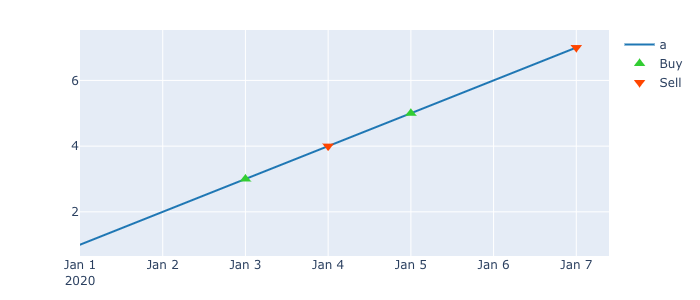

In [19]:
portfolio['a'].plot_trades().show_png()

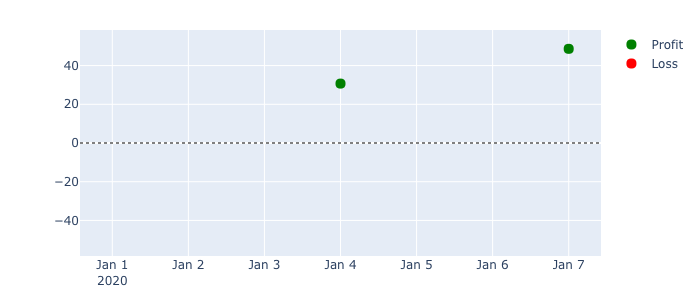

In [20]:
portfolio['a'].plot_position_pl().show_png()